In [2]:
import numpy as np
import pandas as pd
import os
# import seaborn as sb
# import gensim as gen
from emoji import replace_emoji
import rex
import pattern
from pattern.en import lemma
from keybert import KeyBERT
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'emoji'

In [3]:
#path = os.getcwd()
#file_path = os.path.join(path,"Habitat_(Post level)_Merged.xlsx")
#df_excel = pd.read_excel(io=file_path,sheet_name="P col as calculated")
#df_excel.drop(index=0,inplace=True)
#df_excel.shape
df_excep = pd.read_csv('Habitat_(Post level)_Merged.csv', header = 'infer')

FileNotFoundError: [Errno 2] No such file or directory: 'Habitat_(Post level)_Merged.csv'

In [3]:
df_excel.set_index(keys="Post ID",inplace=True)
df_excel.head(2).style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Permalink,Post Message,Type,Countries,Languages,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
Post ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,https://www.facebook.com/habitatmatthews/posts/5193417827345329,"Join our team as a full-time ReStore Truck Driver! This person will serve as an associate of the ReStore and is responsible for donation processing, customer service, retail floor stocking, and retrieval of external donations via the ReStore Truck (AKA you must have the ability to lift more than 50 lbs without assistance and safely lift/move furniture throughout the day). Benefits include health insurance, dental, vision, short-term & long-term disability, life insurance, flex spending, PTO for holidays, and 2 weeks' vacation. Plus getting to work as part of a great team, (mostly), 4-day work week, exercise throughout the day (no gym membership needed!), and being an integral part of the Habitat mission! 🚛 ➡️ 🏡 Visit greatermatthewshabitat.org/careers for more info",Video,nan,nan,2022-03-09 17:00:00,,36,36,0,38,38,0,2,5.555556,0,0,0,0,33,31,0,0,2,7,7,0,0,11,12,0,0,5028,5000
386724564681370_5193403134013465,https://www.facebook.com/habitatmatthews/posts/5193403134013465,"Research has shown that when single women embark on the conventional path to homeownership, they often find themselves face to face with barriers that men are less likely to encounter. At Greater Matthews Habitat for Humanity, we knock down these barriers and empower women to build a stable future. #InternationalWomensDay2022 https://www.greatermatthewshabitat.org/post/women-builds-change-lives",Link,nan,nan,2022-03-08 17:00:01,,44,44,0,45,45,0,3,6.818182,0,0,0,0,39,38,0,0,3,0,0,0,0,0,0,0,0,0,0


In [4]:
columns = ['Post Message','Type','Posted','Lifetime Post Total Reach','Lifetime Post organic reach',
           'Lifetime Post Paid Reach','Lifetime Engaged Users','Ratio of Engagement To Post Entered in screen',
           'Lifetime Negative Feedback from Users','Lifetime Organic views to 95%','Lifetime Paid views to 95%',
            'Lifetime Organic Video Views','Lifetime Paid Video Views']
df_new = df_excel[columns]
df_new.head()

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,Lifetime Organic Video Views,Lifetime Paid Video Views
Post ID,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,5.555556,0,7,0,11,0
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,6.818182,0,0,0,0,0
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,6.493506,0,3,0,19,0
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,2.205882,0,0,0,0,0
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,3.137255,0,0,0,0,0


In [5]:
# If any missing value in post text column, changing it to empty string value
df_new.loc[df_new['Post Message'].isnull()==True,['Post Message','Type']]

,Post Message,Type
Post ID,,
386724564681370_5042038175816629,NaN,Photo
386724564681370_4886720334681748,NaN,SharedVideo
386724564681370_4650712888282495,NaN,Link
386724564681370_451657956291460,NaN,Video
386724564681370_4611148785572239,NaN,Link
386724564681370_4384430274910759,NaN,Link
386724564681370_1467176306957045,NaN,Video
386724564681370_3934192513267873,NaN,Photo


In [6]:
df_new.loc[df_new['Post Message'].isnull()==True,'Post Message'] = ''
row_idx = ['386724564681370_5042038175816629','386724564681370_4886720334681748','386724564681370_1467176306957045',
        '386724564681370_3934192513267873']
df_new.loc[row_idx,'Post Message']

Post ID
386724564681370_5042038175816629    
386724564681370_4886720334681748    
386724564681370_1467176306957045    
386724564681370_3934192513267873    
Name: Post Message, dtype: object

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 386724564681370_5193417827345329 to 386724564681370_3856901330996992
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Post Message                                   412 non-null    object        
 1   Type                                           412 non-null    object        
 2   Posted                                         412 non-null    datetime64[ns]
 3   Lifetime Post Total Reach                      412 non-null    object        
 4   Lifetime Post organic reach                    412 non-null    object        
 5   Lifetime Post Paid Reach                       412 non-null    object        
 6   Lifetime Engaged Users                         412 non-null    object        
 7   Ratio of Engagement To Post Entered in screen  412 non-null    float64       
 8   Lifet

In [9]:
def clean(post_text):
    # sentence = demojize(post_text)
    sentence = replace_emoji(post_text,'')
    sentence = re.sub(r'Visit.*?($|\.$|\.\s|!$|!\s)', '', sentence)
    sentence = re.sub(r'Learn more.*?($|\.$|\.\s|!$|!\s)', '', sentence)
    sentence = re.sub(r'Read more here.*?($|\.$|\.\s|!$|!\s)', '', sentence)
    sentence = re.sub(r'http\S+','',sentence) # remove URL
    sentence = re.sub(r'greatermatthewshabitat.org\S+', '', sentence)

    #lemmatize
    sentence = [lemma(word) for word in sentence.split()]
    sentence = ' '.join(sentence)
    return sentence
    
df_new['clean_txt'] = df_new['Post Message'].apply(clean)

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\1037086387.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_txt'] = df_new['Post Message'].apply(clean)


In [11]:
# print(df_new.loc['386724564681370_5193417827345329','clean_txt'])
print(df_new.loc['386724564681370_5115766841777095','clean_txt'])

construction be an inherently dangerou activity - and because habitat home be build with the help of volunteer labor, safety be our number one priority. congratulation to our homeowner service manager, jeffrey elam, for become a habitat for humanity competent person. he be now train to identify exist or predictable hazard and have the authorization to take prompt corrective measure to eliminate them - and will be able to pass thi information along to our partner family a they prepare to work on site.


In [12]:
df_new.head()

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,Lifetime Organic Video Views,Lifetime Paid Video Views,clean_txt
Post ID,,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,5.555556,0,7,0,11,0,join our team a a full-time restore truck driv...
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,6.818182,0,0,0,0,0,research have show that when single women emba...
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,6.493506,0,3,0,19,0,"today, on international women' day, we celebra..."
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,2.205882,0,0,0,0,0,"cloud come float into my life, no longer to ca..."
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,3.137255,0,0,0,0,0,thi beautiful spring weather bring u back to t...


In [13]:
import json

kw_model = KeyBERT()
keyphrases = []
for idx,value in df_new.iterrows(): 
    if value[0] != '' :        
        k = kw_model.extract_keywords(value[13],keyphrase_ngram_range=(1,2),stop_words='english') 
        keyphrases += list(map(lambda a : a[0], k))
    # df_new.at[idx, 'keyphrases'] = json.dumps(k)
        df_new.loc[idx, 'keyphrases'] = json.dumps(k)

# import json

# kw_model = KeyBERT()
# for idx,value in df_new.iterrows():          
#     k = kw_model.extract_keywords(value[13],keyphrase_ngram_range=(1,2),stop_words=None,use_mmr=True, diversity=0.7) 
#     print(k)        
#     df_new.loc[idx, 'keyphrases'] = json.dumps(k)

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\956736616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[idx, 'keyphrases'] = json.dumps(k)


In [14]:
df_new[df_new['Post Message']=='']

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,Lifetime Organic Video Views,Lifetime Paid Video Views,clean_txt,keyphrases
Post ID,,,,,,,,,,,,,,,
386724564681370_5042038175816629,,Photo,2022-01-21 07:14:34,132,132,0,2,1.515152,1,0,0,0,0,,NaN
386724564681370_4886720334681748,,SharedVideo,2021-12-11 15:35:07,62,62,0,2,3.225806,0,0,0,12,0,,NaN
386724564681370_4650712888282495,,Link,2021-09-28 11:22:13,119,119,0,9,7.563025,1,0,0,0,0,,NaN
386724564681370_451657956291460,,Video,2021-09-25 07:02:15,660,660,0,101,15.303030,1,32,0,330,0,,NaN
386724564681370_4611148785572239,,Link,2021-09-16 11:20:31,193,193,0,13,6.735751,0,0,0,0,0,,NaN
386724564681370_4384430274910759,,Link,2021-07-02 10:18:09,87,87,0,3,3.448276,1,0,0,0,0,,NaN
386724564681370_1467176306957045,,Video,2021-05-15 07:12:19,485,485,0,52,10.721649,0,4,0,230,0,,NaN
386724564681370_3934192513267873,,Photo,2021-01-29 04:59:19,101,101,0,4,3.960396,0,0,0,0,0,,NaN


In [15]:
def filter_val(phrase):
    if 'habitat' in phrase or 'matthew' in phrase or 'humanity' in phrase:
        return False
    return True 
keyphrases = list(filter(filter_val, keyphrases))
keyphrases

['restore truck',
 'truck driver',
 'donation restore',
 'truck',
 'lift 50',
 'single women',
 'empower women',
 'future internationalwomensday2022',
 'women day',
 'international women',
 'women world',
 'strong women',
 'celebrate strong',
 'sunset sky',
 'sunset',
 'color sunset',
 'cloud come',
 'sky rabindranath',
 'butterfly garden',
 'beautiful spring',
 'mission join',
 'opportunity mission',
 'carol burnett',
 'dream',
 'dream ve',
 'let carol',
 'burnett',
 'time nonprofit',
 'employee volunteer',
 'nonprofit',
 'nonprofit communities',
 'encourage employee',
 'intergenerational poverty',
 'affordable house',
 'childhood poverty',
 'reduce intergenerational',
 'reduce childhood',
 'hiring',
 'hiring come',
 'nc home',
 'income repair',
 'nc',
 'resident town',
 'critical repair',
 'repair need',
 'hammer outside',
 'swing hammer',
 'volunteer opportunity',
 'volunteer',
 'affordable house',
 'elevation outreach',
 'outreach fair',
 'elevation church',
 'outreach include',
 '

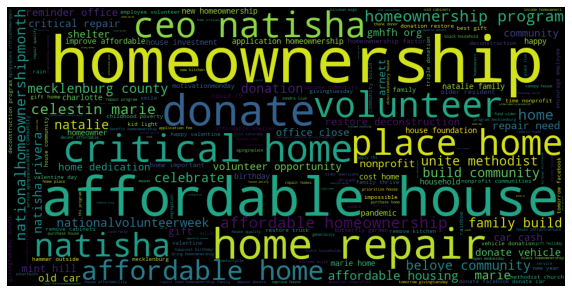

In [16]:
from collections import Counter
from wordcloud import WordCloud

word_could_dict=Counter(keyphrases)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(10,14))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
# plt.close()
plt.show()

In [17]:
df_new[['keyphrases']].head().style.set_properties(subset=['keyphrases'], **{'width': '300px'})

,keyphrases
Post ID,
386724564681370_5193417827345329,"[[""restore truck"", 0.6376], [""truck driver"", 0.443], [""donation restore"", 0.4401], [""truck"", 0.4356], [""lift 50"", 0.3985]]"
386724564681370_5193403134013465,"[[""single women"", 0.5133], [""empower women"", 0.4758], [""future internationalwomensday2022"", 0.4262], [""matthew habitat"", 0.4076], [""habitat humanity"", 0.3999]]"
386724564681370_5191248920895553,"[[""women day"", 0.6557], [""international women"", 0.605], [""women world"", 0.5633], [""strong women"", 0.5596], [""celebrate strong"", 0.5095]]"
386724564681370_4964595313560916,"[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [""color sunset"", 0.5179], [""cloud come"", 0.5116], [""sky rabindranath"", 0.5051]]"
386724564681370_5180400168647095,"[[""habitat matthews"", 0.6018], [""butterfly garden"", 0.578], [""beautiful spring"", 0.5329], [""habitat"", 0.5249], [""founder habitat"", 0.5098]]"


In [18]:
# Adding Columns -  Ratio of 95% organic videos, Ratio of more than 3 sec organic videos, Ratio of 95% paid Views, Ratio of more than 3 sec paid videos
df_new['Ratio_95%_OV'] = (df_new['Lifetime Organic views to 95%']/df_new['Lifetime Post organic reach']) * 100
df_new['Ratio_3sec_OV'] = (df_new['Lifetime Organic Video Views']/df_new['Lifetime Post organic reach']) * 100

for idx,val in df_new.iterrows():
    if val['Lifetime Post Paid Reach'] != 0:
        df_new.at[idx,'Ratio_95%_PV'] = (val['Lifetime Paid views to 95%']/val['Lifetime Post Paid Reach']) * 100
        df_new.at[idx,'Ratio_3sec_PV'] = (val['Lifetime Paid Video Views']/val['Lifetime Post Paid Reach']) * 100
    else:
        df_new.at[idx,'Ratio_95%_PV'] = 0
        df_new.at[idx,'Ratio_3sec_PV'] = 0

df_new.head(n=15)

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\1607126734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Ratio_95%_OV'] = (df_new['Lifetime Organic views to 95%']/df_new['Lifetime Post organic reach']) * 100
C:\Users\baira\AppData\Local\Temp\ipykernel_10120\1607126734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Ratio_3sec_OV'] = (df_new['Lifetime Organic Video Views']/df_new['Lifetime Post organic reach']) * 100
C:\Users\baira\AppData\Local\Temp\ipykernel_10120\1607126734.py:

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,Lifetime Paid views to 95%,Lifetime Organic Video Views,Lifetime Paid Video Views,clean_txt,keyphrases,Ratio_95%_OV,Ratio_3sec_OV,Ratio_95%_PV,Ratio_3sec_PV
Post ID,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,5.555556,0,7,0,11,0,join our team a a full-time restore truck driv...,"[[""restore truck"", 0.6376], [""truck driver"", 0...",19.444444,30.555556,0.000000,0.000000
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,6.818182,0,0,0,0,0,research have show that when single women emba...,"[[""single women"", 0.5133], [""empower women"", 0...",0.0,0.0,0.000000,0.000000
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,6.493506,0,3,0,19,0,"today, on international women' day, we celebra...","[[""women day"", 0.6557], [""international women""...",3.896104,24.675325,0.000000,0.000000
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,2.205882,0,0,0,0,0,"cloud come float into my life, no longer to ca...","[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [...",0.0,0.0,0.000000,0.000000
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,3.137255,0,0,0,0,0,thi beautiful spring weather bring u back to t...,"[[""habitat matthews"", 0.6018], [""butterfly gar...",0.0,0.0,0.000000,0.000000
386724564681370_5176805572339888,Looking for a great place to work and an oppor...,Link,2022-03-02 07:05:11,106,106,0,3,2.830189,0,0,0,0,0,look for a great place to work and an opportun...,"[[""matthew habitat"", 0.5803], [""habitat humani...",0.0,0.0,0.000000,0.000000
386724564681370_5174106639276448,"Every Habitat for Humanity home is special, bu...",Link,2022-03-01 07:55:22,110,110,0,4,3.636364,0,0,0,0,0,"every habitat for humanity home be special, bu...","[[""habitat humanity"", 0.6111], [""habitat home""...",0.0,0.0,0.000000,0.000000
386724564681370_4964590473561400,"When you have a dream, you've got to grab it a...",Photo,2022-02-28 06:52:44,114,114,0,2,1.754386,1,0,0,0,0,"when you have a dream, you've get to grab it a...","[[""carol burnett"", 0.4743], [""dream"", 0.4311],...",0.0,0.0,0.000000,0.000000
386724564681370_5162944490392663,Many companies not only encourage their employ...,Photo,2022-02-27 09:04:00,75,75,0,2,2.666667,0,0,0,0,0,many company not only encourage their employee...,"[[""time nonprofit"", 0.5664], [""employee volunt...",0.0,0.0,0.000000,0.000000


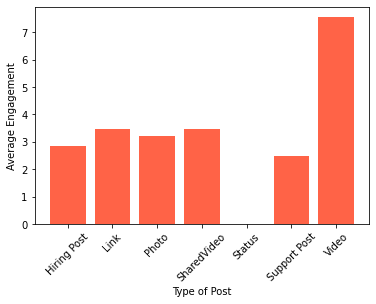

In [20]:
# Plot mean engagement ratio based on type of Post
# plt.figure(figsize=(5, 5))
plt.bar(engage_on_type.index,engage_on_type,color='tomato')
plt.xticks(rotation = 45)
plt.xlabel('Type of Post')
plt.ylabel('Average Engagement')
plt.show()

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\1007259347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['weekday'] = df_new['Posted'].dt.day_name()


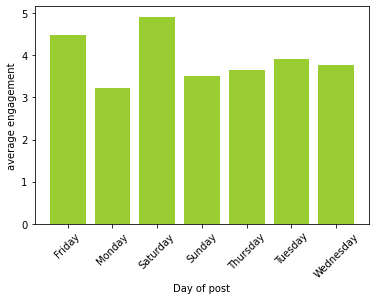

In [21]:
# Engagement on weekdays
df_new['weekday'] = df_new['Posted'].dt.day_name()
engage_on_wkday = df_new.groupby("weekday")['Ratio of Engagement To Post Entered in screen'].mean()
plt.bar(engage_on_wkday.index,engage_on_wkday,color='yellowgreen')
plt.xticks(rotation = 45)
plt.xlabel('Day of post')
plt.ylabel('average engagement')
plt.show()

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\2625155619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['hour'] = df_new['Posted'].dt.hour


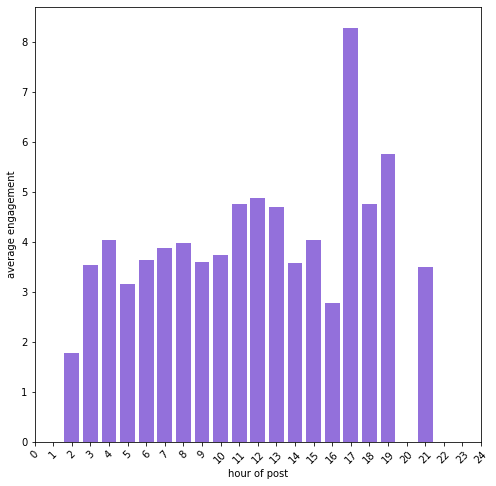

In [22]:
# engagement on time(hour)
plt.figure(figsize=(8, 8))
df_new['hour'] = df_new['Posted'].dt.hour
engage_on_hour = df_new.groupby("hour")['Ratio of Engagement To Post Entered in screen'].mean()
plt.bar(engage_on_hour.index,engage_on_hour,color='mediumpurple')
plt.xticks(np.arange(0,25,1),rotation = 45)
plt.xlabel('hour of post')
plt.ylabel('average engagement')
plt.show()

In [23]:
# Top 10 engaging posts
df_top10 = df_new[['Type','Posted','Ratio of Engagement To Post Entered in screen','keyphrases']].sort_values(by='Ratio of Engagement To Post Entered in screen',axis=0,ascending=False)
df_top10.head(10).style.set_properties(subset=['keyphrases'], **{'width': '300px'})

,Type,Posted,Ratio of Engagement To Post Entered in screen,keyphrases
Post ID,,,,
386724564681370_4647181291968988,Photo,2021-09-27 09:18:22,18.807060,"[[""council nancy"", 0.5207], [""nancy glenn"", 0.5089], [""ceo natisha"", 0.5011], [""glenn award"", 0.4935], [""matthew community"", 0.4689]]"
386724564681370_4200917089928746,Video,2021-04-30 13:23:06,15.625000,"[[""ready burgers"", 0.4687], [""grill"", 0.447], [""brat volunteer"", 0.4403], [""build committee"", 0.4363], [""burgers beers"", 0.4336]]"
386724564681370_4133391826681273,Video,2021-04-11 06:32:56,15.467626,"[[""habitat home"", 0.7028], [""habitat humanity"", 0.6669], [""support habitat"", 0.6109], [""habitat"", 0.5687], [""habitat tremendou"", 0.5583]]"
386724564681370_451657956291460,Video,2021-09-25 07:02:15,15.303030,nan
386724564681370_3869711133049345,Video,2021-01-09 11:10:18,14.930556,"[[""help family"", 0.5755], [""family"", 0.5203], [""homeownership improve"", 0.506], [""generosity"", 0.4988], [""mean family"", 0.4771]]"
386724564681370_4545897192097399,Link,2021-08-28 08:42:28,14.076246,"[[""willie"", 0.4999], [""willie story"", 0.4995], [""read willie"", 0.4941], [""willie said"", 0.4822], [""willie able"", 0.4552]]"
386724564681370_4988371727849941,Video,2022-01-07 11:58:45,13.284133,"[[""affordable shelter"", 0.6227], [""affordable house"", 0.5908], [""childhood poverty"", 0.5277], [""shelter income"", 0.4879], [""shelter"", 0.4759]]"
386724564681370_4027400280613762,Video,2021-03-02 10:16:22,12.500000,"[[""coordinator liz"", 0.5644], [""volunteer coordinator"", 0.5033], [""liz left"", 0.4853], [""new volunteer"", 0.474], [""service coordinator"", 0.4404]]"
386724564681370_5162938497059929,Video,2022-02-26 17:00:06,12.500000,"[[""intergenerational poverty"", 0.6523], [""affordable house"", 0.6495], [""childhood poverty"", 0.5958], [""reduce intergenerational"", 0.5655], [""reduce childhood"", 0.5328]]"


In [24]:
df_post_len = df_new.loc[:,:]
df_post_len['post_length'] = df_post_len['Post Message'].apply(lambda x: len(x.split()))
df_post_len.head()

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\2548397334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_len['post_length'] = df_post_len['Post Message'].apply(lambda x: len(x.split()))


,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,...,Lifetime Paid Video Views,clean_txt,keyphrases,Ratio_95%_OV,Ratio_3sec_OV,Ratio_95%_PV,Ratio_3sec_PV,weekday,hour,post_length
Post ID,,,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,5.555556,0,7,...,0,join our team a a full-time restore truck driv...,"[[""restore truck"", 0.6376], [""truck driver"", 0...",19.444444,30.555556,0.0,0.0,Wednesday,17,120
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,6.818182,0,0,...,0,research have show that when single women emba...,"[[""single women"", 0.5133], [""empower women"", 0...",0.0,0.0,0.0,0.0,Tuesday,17,51
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,6.493506,0,3,...,0,"today, on international women' day, we celebra...","[[""women day"", 0.6557], [""international women""...",3.896104,24.675325,0.0,0.0,Tuesday,4,47
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,2.205882,0,0,...,0,"cloud come float into my life, no longer to ca...","[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [...",0.0,0.0,0.0,0.0,Monday,6,25
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,3.137255,0,0,...,0,thi beautiful spring weather bring u back to t...,"[[""habitat matthews"", 0.6018], [""butterfly gar...",0.0,0.0,0.0,0.0,Thursday,13,37


In [25]:
# df_post_len['post_length'].min() --> 0
df_post_len['post_length'].max()

192

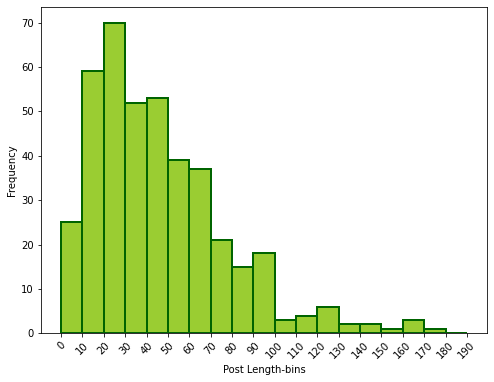

In [26]:
plt.figure(figsize=(8,6))
plt.hist(df_post_len['post_length'], bins=np.arange(min(df_post_len['post_length']), 200, 10),color='yellowgreen',edgecolor='darkgreen',linewidth=2)
plt.xticks(range(0,200,10),rotation=45)
plt.xlabel('Post Length-bins')
plt.ylabel('Frequency')
plt.show()

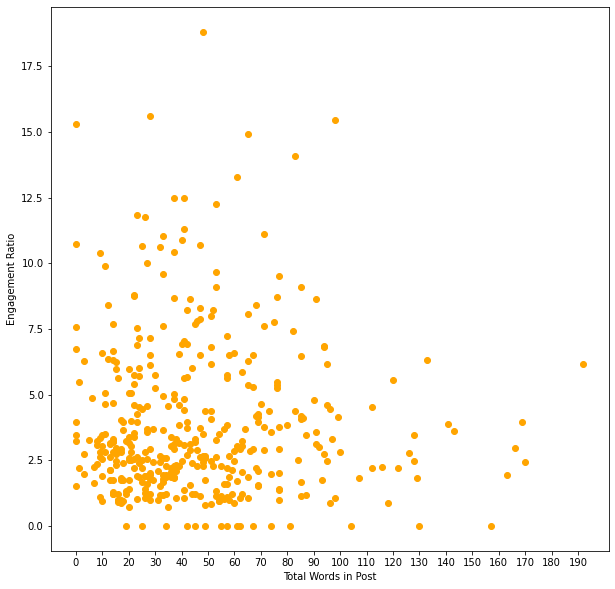

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(x=df_post_len['post_length'],y=df_post_len['Ratio of Engagement To Post Entered in screen'],c='orange')
plt.xticks(range(0,200,10))
plt.xlabel('Total Words in Post')
plt.ylabel('Engagement Ratio')
plt.show()

In [28]:
df_post_len.head()

,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,...,Lifetime Paid Video Views,clean_txt,keyphrases,Ratio_95%_OV,Ratio_3sec_OV,Ratio_95%_PV,Ratio_3sec_PV,weekday,hour,post_length
Post ID,,,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,5.555556,0,7,...,0,join our team a a full-time restore truck driv...,"[[""restore truck"", 0.6376], [""truck driver"", 0...",19.444444,30.555556,0.0,0.0,Wednesday,17,120
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,6.818182,0,0,...,0,research have show that when single women emba...,"[[""single women"", 0.5133], [""empower women"", 0...",0.0,0.0,0.0,0.0,Tuesday,17,51
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,6.493506,0,3,...,0,"today, on international women' day, we celebra...","[[""women day"", 0.6557], [""international women""...",3.896104,24.675325,0.0,0.0,Tuesday,4,47
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,2.205882,0,0,...,0,"cloud come float into my life, no longer to ca...","[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [...",0.0,0.0,0.0,0.0,Monday,6,25
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,3.137255,0,0,...,0,thi beautiful spring weather bring u back to t...,"[[""habitat matthews"", 0.6018], [""butterfly gar...",0.0,0.0,0.0,0.0,Thursday,13,37


In [30]:
# Keeping Organic Reach of post(Page's post enter their screen through unpaid distribution)
df_organic_reach = df_post_len.loc[:,:]
df_organic_reach.drop(df_organic_reach[df_organic_reach['Lifetime Post Paid Reach']!=0].index,inplace=True)
df_organic_reach.shape

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\697438546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_organic_reach.drop(df_organic_reach[df_organic_reach['Lifetime Post Paid Reach']!=0].index,inplace=True)


(384, 22)

In [32]:
# Calculating Organic reach Engagement
df_organic_reach['organic_eng_ratio'] = (df_organic_reach['Lifetime Engaged Users']/ df_organic_reach['Lifetime Post Total Reach']) * 100
df_organic_reach.head()

C:\Users\baira\AppData\Local\Temp\ipykernel_10120\1391078536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_organic_reach['organic_eng_ratio'] = (df_organic_reach['Lifetime Engaged Users']/ df_organic_reach['Lifetime Post Total Reach']) * 100


,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Engaged Users,Ratio of Engagement To Post Entered in screen,Lifetime Negative Feedback from Users,Lifetime Organic views to 95%,...,clean_txt,keyphrases,Ratio_95%_OV,Ratio_3sec_OV,Ratio_95%_PV,Ratio_3sec_PV,weekday,hour,post_length,organic_eng_ratio
Post ID,,,,,,,,,,,,,,,,,,,,,
386724564681370_5193417827345329,Join our team as a full-time ReStore Truck Dri...,Video,2022-03-09 17:00:00,36,36,0,2,5.555556,0,7,...,join our team a a full-time restore truck driv...,"[[""restore truck"", 0.6376], [""truck driver"", 0...",19.444444,30.555556,0.0,0.0,Wednesday,17,120,5.555556
386724564681370_5193403134013465,Research has shown that when single women emba...,Link,2022-03-08 17:00:01,44,44,0,3,6.818182,0,0,...,research have show that when single women emba...,"[[""single women"", 0.5133], [""empower women"", 0...",0.0,0.0,0.0,0.0,Tuesday,17,51,6.818182
386724564681370_5191248920895553,"Today, on International Women's Day, we celebr...",Video,2022-03-08 04:39:04,77,77,0,5,6.493506,0,3,...,"today, on international women' day, we celebra...","[[""women day"", 0.6557], [""international women""...",3.896104,24.675325,0.0,0.0,Tuesday,4,47,6.493506
386724564681370_4964595313560916,"Clouds come floating into my life, no longer t...",Photo,2022-03-07 06:55:24,136,136,0,3,2.205882,0,0,...,"cloud come float into my life, no longer to ca...","[[""sunset sky"", 0.5577], [""sunset"", 0.5267], [...",0.0,0.0,0.0,0.0,Monday,6,25,2.205882
386724564681370_5180400168647095,This beautiful spring weather brings us back t...,Link,2022-03-03 13:11:13,255,255,0,8,3.137255,0,0,...,thi beautiful spring weather bring u back to t...,"[[""habitat matthews"", 0.6018], [""butterfly gar...",0.0,0.0,0.0,0.0,Thursday,13,37,3.137255


<AxesSubplot:xlabel='Type'>

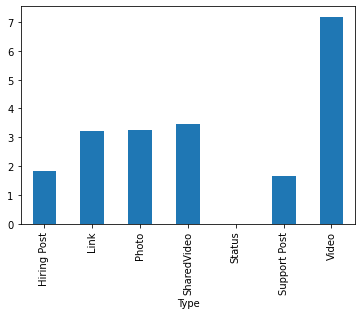

In [33]:
# Plotting average engagement based on Post Type for Organic reach
df_organic_reach.groupby("Type")['organic_eng_ratio'].mean()\
    .plot(kind='bar')